In [3]:
import pandas as pd
import numpy as np
import datetime, warnings, scipy
import matplotlib.pyplot as plt
import math
import category_encoders as ce
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")

In [1]:
!pip3 install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip3 install keras

Defaulting to user installation because normal site-packages is not writeable


In [4]:
airlines = pd.read_csv(r"C:\Users\pitee\Downloads\archive (7)\airlines.csv")
airports = pd.read_csv(r"C:\Users\pitee\Downloads\archive (7)\airports.csv")
flights = pd.read_csv(r"C:\Users\pitee\Downloads\archive (7)\flights.csv")

In [5]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [13]:
flights.shape

(5819079, 25)

In [14]:
flights.describe().round(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
count,5819079.0,5819079.00,5819079.00,5819079.00,5819079.00,5819079.00,5732926.00,5732926.00,5730032.00,5730032.00,...,5714008.00,5714008.00,5819079.00,5726566.00,5726566.00,5819079.00,5726566.00,5714008.00,5819079.00,5819079.00
mean,2015.0,6.52,15.70,3.93,2173.09,1329.60,1335.20,9.37,16.07,1357.17,...,137.01,113.51,822.36,1471.47,7.43,1493.81,1476.49,4.41,0.00,0.02
std,0.0,3.41,8.78,1.99,1757.06,483.75,496.42,37.08,8.90,498.01,...,74.21,72.23,607.78,522.19,5.64,507.16,526.32,39.27,0.05,0.12
min,2015.0,1.00,1.00,1.00,1.00,1.00,1.00,-82.00,1.00,1.00,...,14.00,7.00,21.00,1.00,1.00,1.00,1.00,-87.00,0.00,0.00
25%,2015.0,4.00,8.00,2.00,730.00,917.00,921.00,-5.00,11.00,935.00,...,82.00,60.00,373.00,1054.00,4.00,1110.00,1059.00,-13.00,0.00,0.00
50%,2015.0,7.00,16.00,4.00,1690.00,1325.00,1330.00,-2.00,14.00,1343.00,...,118.00,94.00,647.00,1509.00,6.00,1520.00,1512.00,-5.00,0.00,0.00
75%,2015.0,9.00,23.00,6.00,3230.00,1730.00,1740.00,7.00,19.00,1754.00,...,168.00,144.00,1062.00,1911.00,9.00,1918.00,1917.00,8.00,0.00,0.00
max,2015.0,12.00,31.00,7.00,9855.00,2359.00,2400.00,1988.00,225.00,2400.00,...,766.00,690.00,4983.00,2400.00,248.00,2400.00,2400.00,1971.00,1.00,1.00


In [15]:
flights.isna().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER             14721
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
dtype: int64

In [16]:
flights = flights.drop(['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], axis=1)

KeyError: "['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'] not found in axis"

In [ ]:
flights = flights.drop(['CANCELLATION_REASON'], axis=1)

In [ ]:
flights.head()

In [ ]:
flights.shape

In [17]:
flights.isna().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER             14721
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
dtype: int64

In [18]:
print(flights.head())

   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ELAPSED_TIME  \
0            ANC                 SEA                    5  ...         194.0   
1            LAX                 PBI                   10  ...         279.0   
2            SFO                 CLT                   20  ...         293.0   
3            LAX                 MIA                   20  ...         281.0   
4            SEA                 ANC                   25  ...         215.0   

   AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
0     169.0   

In [19]:
flights[flights['QUARTER'] == 3]

KeyError: 'QUARTER'

In [ ]:
flights_filtered = flights[flights['MONTH'].isin([7, 9])]
flights_filtered.shape

In [ ]:
flights['MONTH'] = flights['MONTH'].dt.month.astype('int64')

In [20]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


In [21]:
flights.isna().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER             14721
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
dtype: int64

In [22]:
flights_filtered = flights[flights['MONTH'].isin([7,8,9])]
flights_filtered.shape

(1496200, 25)

In [23]:
flights_filtered = flights_filtered[['MONTH', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
                   'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY',
                   'SCHEDULED_TIME', 'ELAPSED_TIME', 'DISTANCE']]

In [24]:
flights_filtered.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE
2889512,7,3,NK,LAS,IAH,3,38.0,500,40.0,177.0,179.0,1222
2889513,7,3,AA,SFO,CLT,5,-5.0,808,-2.0,303.0,306.0,2296
2889514,7,3,DL,LAX,MEM,5,-5.0,548,16.0,223.0,244.0,1619
2889515,7,3,NK,LAS,MSP,5,48.0,503,49.0,178.0,179.0,1299
2889516,7,3,UA,ANC,ORD,8,9.0,912,3.0,364.0,358.0,2846


In [25]:
flights_filtered.shape

(1496200, 12)

In [26]:
flights_filtered['TIME_DELAY'] = flights_filtered.ELAPSED_TIME - flights_filtered.SCHEDULED_TIME

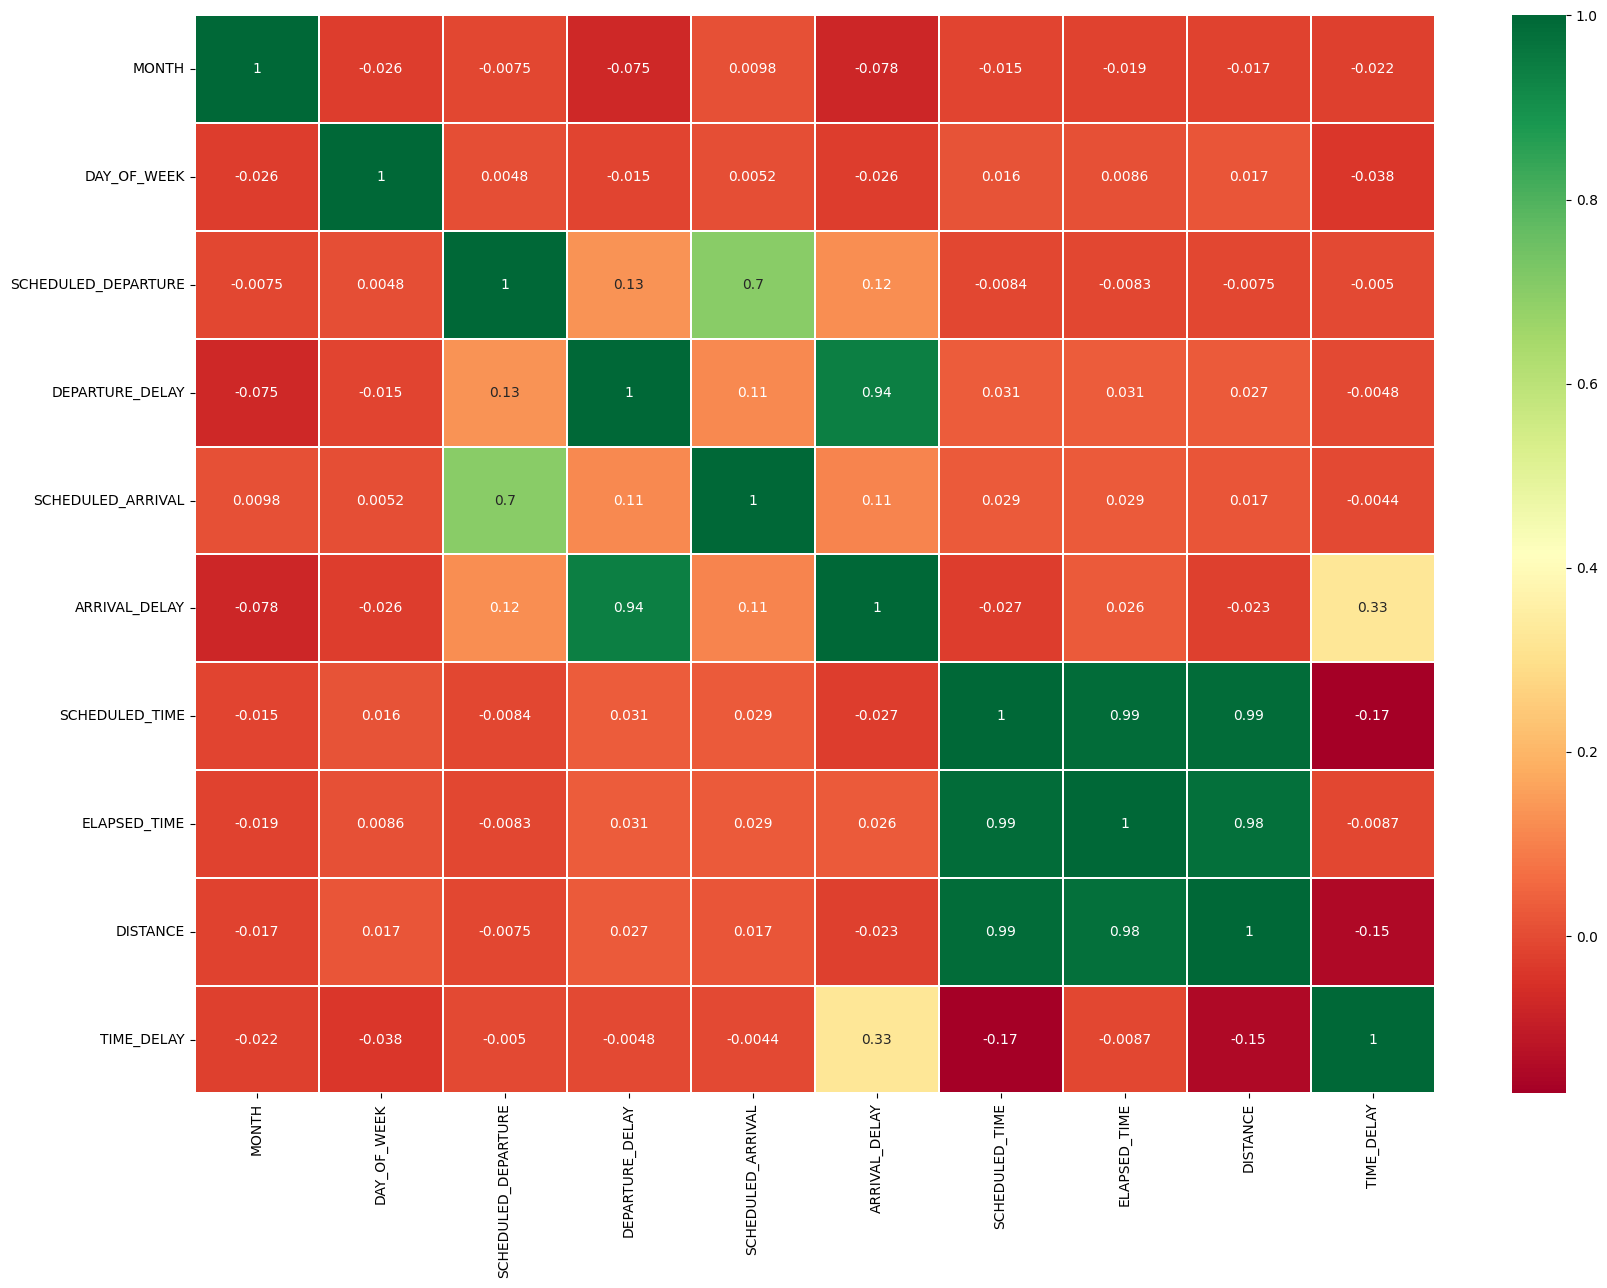

In [27]:
# correlation matrix
sns.heatmap(flights_filtered.corr(),annot=True,cmap='RdYlGn',linewidths=0.01) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,14)
plt.show()

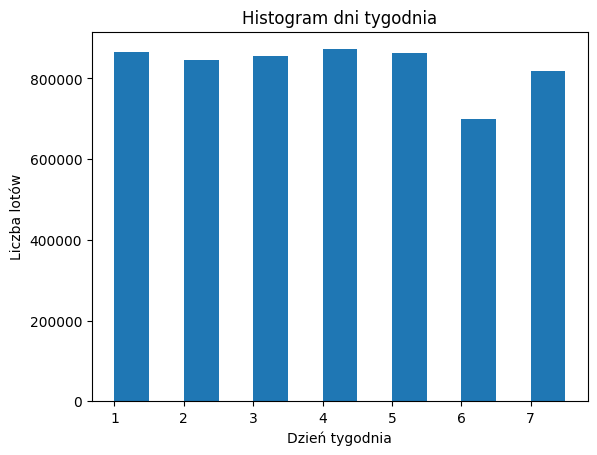

In [28]:
plt.hist(flights['DAY_OF_WEEK'], bins=[1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5])
plt.title("Histogram dni tygodnia")
plt.xlabel("Dzień tygodnia")
plt.ylabel("Liczba lotów")
plt.xticks(range(1, 8))
plt.show()

In [29]:
!pip3 install --upgrade pip
!pip3 install typing-extensions==4.6.1
!pip3 install --upgrade fastapi pydantic pydantic-core typeguard
!pip3 install ydata-profiling 

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
  Using cached pip-23.3.1-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for typing-extensions==4.6.1 from https://files.pythonhosted.org/packages/82/ed/8ccf53a0ed10bf8fc8877b5833b40f5f99093cadfe6632b8892f74aead0f/typing_extensions-4.6.1-py3-none-any.whl.metadata
  Using cached typing_extensions-4.6.1-py3-none-any.whl.metadata (2.8 kB)
Using cached typing_extensions-4.6.1-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastapi 0.104.1 requires typing-extensions>=4.8.0, but you have typing-extensions 4.6.1 which is incompatible.
typeguard 4.1.5 requires typing-extensions>=4.7.0; python_version < "3.12", but you have typing-extensions 4.6.1 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/24/21/7d397a4b7934ff4028987914ac1044d3b7d52712f30e2ac7a2ae5bc86dd0/typing_extensions-4.8.0-py3-none-any.whl.metadata
  Using cached typing_extensions-4.8.0-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.6.1
    Uninstalling typing_extensions-4.6.1:
      Successfully uninstalled typing_extensions-4.6.1
Defaulting to user installation because normal site-packages is not writeable


In [30]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np

In [ ]:
#df = pd.DataFrame(np.random.rand(100, 5), columns=["a", "b", "c", "d", "e"])
#profile = ProfileReport(df, title="Profiling Report")

In [31]:
profile = ProfileReport(flights, title="Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]